# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset:

In [49]:
df_path = "C:/Users/mohan/Desktop/UNT_Documents/Fall2021/FeatureEngineering/ICE-1/Classification_AutonomousCars/01. Dataset Creation/"
df_path2 = df_path + 'AutonomousCars_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [50]:
df.head()

File_Name                                            Content  \
0     1.txt  b'Road vehicle that is capable of moving safel...   
1   100.txt  b"The U.S. Department of Transportation (USDOT...   
2   101.txt  b'National Security Implications of Leadership...   
3   102.txt  b'Road vehicle that is capable of moving safel...   
4   104.txt  b'The dream of the self-driving car \xe2\x80\x...   

          Category        Complete_Filename  
0  Autonomous Cars    1.txt-Autonomous Cars  
1  Autonomous Cars  100.txt-Autonomous Cars  
2  Autonomous Cars  101.txt-Autonomous Cars  
3  Autonomous Cars  102.txt-Autonomous Cars  
4  Autonomous Cars  104.txt-Autonomous Cars

### Number of articles in each category

In [51]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

### % of articles in each category

In [52]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [53]:
df['News_length'] = df['Content'].str.len()

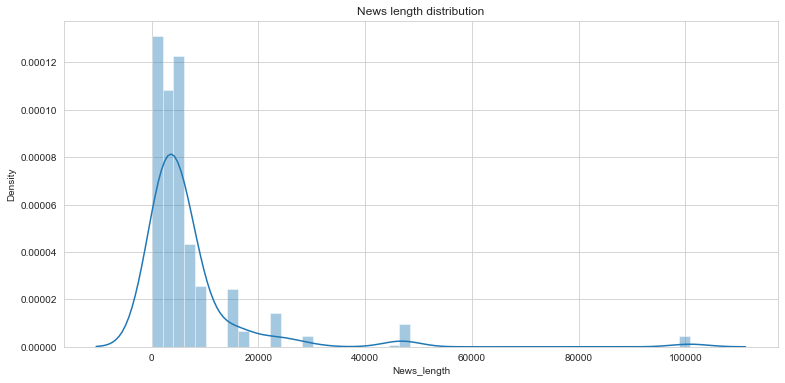

In [54]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [55]:
df['News_length'].describe()

count       526.000000
mean       7209.826996
std       12153.823592
min           3.000000
25%        1823.000000
50%        4371.000000
75%        7052.000000
max      100847.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [56]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

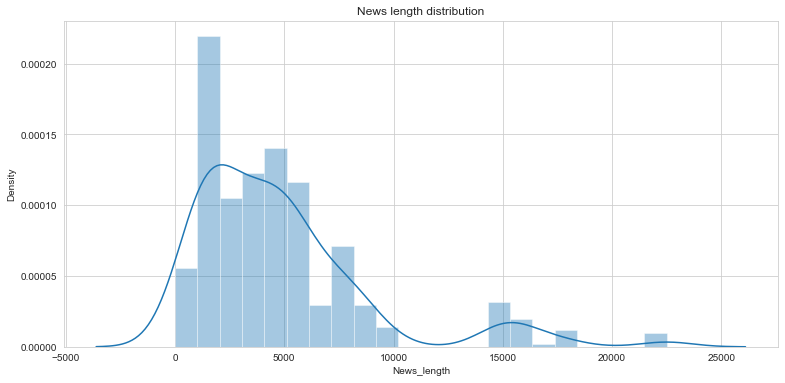

In [57]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [58]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

70

Let's see one:

In [59]:
df_more10k['Content'].iloc[0]

'b\'Road vehicle that is capable of moving safely with little or no human input\\n\\nFor broader coverage of this topic, see Vehicular automation\\n\\nA self-driving car, also known as an autonomous vehicle (AV or auto), driverless car, or robo-car (robotic car),[1][2][3] is a vehicle that is capable of sensing its environment and moving safely with little or no human input.[4][5]\\n\\nSelf-driving cars combine a variety of sensors to perceive their surroundings, such as radar, lidar, sonar, GPS, odometry and inertial measurement units.[1][4] Advanced control systems interpret sensory information to identify appropriate navigation paths, as well as obstacles and relevant signage.[4][6][7][8]\\n\\nPossible implementations of the technology include personal self-driving vehicles, shared robotaxis, connected vehicle platoons and long-distance trucking.[4] Several projects to develop a fully self-driving commercial car are in various stages of development. Waymo became the first service pr

It's just a large news article.

Let's now plot a boxplot:

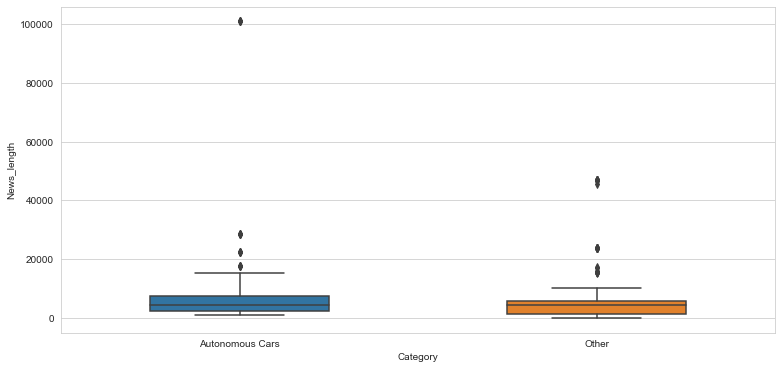

In [60]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

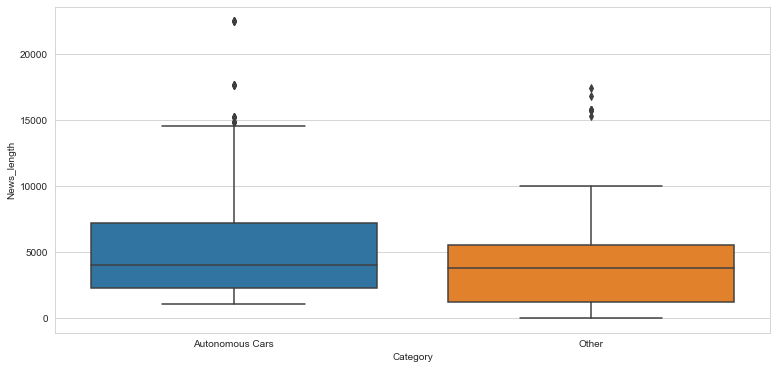

In [61]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [62]:
with open('AutonomousCars_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)